## Introducción de Pytorch

In [1]:
%%capture
!pip install torchinfo

In [2]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
torch.manual_seed(0)

data = load_iris(as_frame=True)
df = data["data"]
df["target"] = data["target"]
df = df.sample(frac=1,random_state = 1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,2
137,6.4,3.1,5.5,1.8,2
72,6.3,2.5,4.9,1.5,1
140,6.7,3.1,5.6,2.4,2


In [3]:
X = df.drop(columns="target").to_numpy()
y = df.target.values
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
X, y

(tensor([[5.8000, 4.0000, 1.2000, 0.2000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [7.9000, 3.8000, 6.4000, 2.0000],
         [6.3000, 3.3000, 4.7000, 1.6000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [5.1000, 3.8000, 1.9000, 0.4000],
         [4.7000, 3.2000, 1.6000, 0.2000],
         [6.9000, 3.2000, 5.7000, 2.3000],
         [5.6000, 2.7000, 4.2000, 1.3000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [7.1000, 3.0000, 5.9000, 2.1000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [6.0000, 2.9000, 4.5000, 1.5000],
         [4.4000, 3.2000, 1.3000, 0.2000],
         [5.8000, 2.6000, 4.0000, 1.2000],
         [5.6000, 3.0000, 4.5000, 1.5000],
         [5.4000, 3.4000, 1.5000, 0.4000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [5.4000, 3.0000, 4.5000, 1.5000],
         [6.7000, 3.0000, 5.0000, 1.7000],
         [5

## Feed Forward Networks en Pytorch

In [5]:
fc1 = nn.Linear(in_features = 4, out_features=12)
phi1_py = fc1(X)
phi1_py


tensor([[ 0.2620, -0.5313,  0.3907,  ..., -0.0451, -1.2113, -2.9476],
        [-1.2096, -0.2586, -0.1372,  ...,  0.1342, -1.1130, -1.4764],
        [-1.7676, -0.3754, -0.3786,  ...,  0.2964, -1.2234, -1.6176],
        ...,
        [-2.1432, -0.3500, -0.5168,  ...,  0.3048, -1.1075, -1.1932],
        [-2.6030,  0.0033, -0.6494,  ...,  0.8202, -1.6117, -1.0077],
        [ 0.1126, -0.4532,  0.3573,  ...,  0.0660, -1.0688, -2.4856]],
       grad_fn=<AddmmBackward0>)

In [6]:
W1 = fc1.weight.data
b1 = fc1.bias.data

W1.shape, b1.shape

(torch.Size([12, 4]), torch.Size([12]))

In [7]:
phi1 = X@W1.T + b1
print(phi1.shape)
phi1

torch.Size([150, 12])


tensor([[ 0.2620, -0.5313,  0.3907,  ..., -0.0451, -1.2113, -2.9476],
        [-1.2096, -0.2586, -0.1372,  ...,  0.1342, -1.1130, -1.4764],
        [-1.7676, -0.3754, -0.3786,  ...,  0.2964, -1.2234, -1.6176],
        ...,
        [-2.1432, -0.3500, -0.5168,  ...,  0.3048, -1.1075, -1.1932],
        [-2.6030,  0.0033, -0.6494,  ...,  0.8202, -1.6117, -1.0077],
        [ 0.1126, -0.4532,  0.3573,  ...,  0.0660, -1.0688, -2.4856]])

In [8]:
torch.equal(phi1_py, phi1)

True

In [9]:
## Si creamos más capas
relu = nn.ReLU()
z1 = relu(phi1_py)
fc2 = nn.Linear(12,20)
phi2_py = fc2(z1)
relu2 = nn.ReLU()
z2 = relu2(phi2_py)
fc3 = nn.Linear(20,1)
z = fc3(z2)
z

tensor([[0.0850],
        [0.1158],
        [0.1566],
        [0.0927],
        [0.2101],
        [0.1749],
        [0.1780],
        [0.1111],
        [0.0875],
        [0.1876],
        [0.1431],
        [0.1079],
        [0.1764],
        [0.1703],
        [0.1568],
        [0.0786],
        [0.1356],
        [0.1595],
        [0.0958],
        [0.0805],
        [0.1339],
        [0.1579],
        [0.1655],
        [0.0855],
        [0.1789],
        [0.1475],
        [0.0927],
        [0.0964],
        [0.1454],
        [0.1455],
        [0.1592],
        [0.1807],
        [0.1270],
        [0.1677],
        [0.1730],
        [0.0929],
        [0.1187],
        [0.0888],
        [0.1514],
        [0.1430],
        [0.1736],
        [0.0900],
        [0.1135],
        [0.1655],
        [0.1514],
        [0.1747],
        [0.1051],
        [0.0871],
        [0.0843],
        [0.1457],
        [0.0904],
        [0.0880],
        [0.2179],
        [0.1765],
        [0.1688],
        [0

In [10]:
class NNet(nn.Module):
  def __init__(self, n, d1=12, d2=20, k=1):
    super().__init__()
    self.fc1 = nn.Linear(n, d1)
    self.fc2 = nn.Linear(d1,d2)
    self.fc3 = nn.Linear(d2, k)
    self.relu1 = nn.ReLU(inplace = True)
    self.relu2 = nn.ReLU(inplace = True)

  def forward(self,x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    return x

model = NNet(n=4)
model(X)

tensor([[0.4225],
        [0.3099],
        [0.4244],
        [0.3862],
        [0.5377],
        [0.4182],
        [0.4358],
        [0.3707],
        [0.3167],
        [0.4410],
        [0.3486],
        [0.3905],
        [0.4519],
        [0.4207],
        [0.3808],
        [0.2955],
        [0.3573],
        [0.3610],
        [0.3648],
        [0.3387],
        [0.3516],
        [0.3486],
        [0.4267],
        [0.3441],
        [0.4791],
        [0.3598],
        [0.4078],
        [0.3664],
        [0.3981],
        [0.3786],
        [0.3935],
        [0.4814],
        [0.3439],
        [0.3998],
        [0.3508],
        [0.3738],
        [0.3278],
        [0.3528],
        [0.4068],
        [0.4307],
        [0.4275],
        [0.3512],
        [0.3751],
        [0.4109],
        [0.4209],
        [0.4984],
        [0.4038],
        [0.3504],
        [0.3104],
        [0.3223],
        [0.3482],
        [0.3832],
        [0.5226],
        [0.4387],
        [0.4878],
        [0

## El nn.Module

El nn.Module permite generar modelos modularizados y reutilizables.

El nn.Module tiene dos componentes, el `__init__()` y el `forward()`.

* El `__init__()` es lo que se llama un constructor. Es donde se inicializarán todos las capas que serán utilizadas por el modelo.

* El `forward()` se encarga de indicar como se conecta cada capa.

In [11]:
class MLP(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.fc1 = nn.Linear(in_features, out_features)


    ## Esto permite iniciar las capas con una matriz de parámetros arbitraria.
    self.fc1.weight.data = W1
    self.fc1.bias.data = b1
  def forward(self,x):
    x = self.fc1(x)
    return x

model = MLP(in_features=4, out_features = 12)
model(X)

tensor([[ 0.2620, -0.5313,  0.3907,  ..., -0.0451, -1.2113, -2.9476],
        [-1.2096, -0.2586, -0.1372,  ...,  0.1342, -1.1130, -1.4764],
        [-1.7676, -0.3754, -0.3786,  ...,  0.2964, -1.2234, -1.6176],
        ...,
        [-2.1432, -0.3500, -0.5168,  ...,  0.3048, -1.1075, -1.1932],
        [-2.6030,  0.0033, -0.6494,  ...,  0.8202, -1.6117, -1.0077],
        [ 0.1126, -0.4532,  0.3573,  ...,  0.0660, -1.0688, -2.4856]],
       grad_fn=<AddmmBackward0>)

> La gracia de poder utilizar el `nn.Module` es poder combinar Módulos para crear Módulos más grandes.

In [12]:
class MLP2(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.fc1 = nn.Linear(in_features, out_features)
    self.relu = nn.ReLU(inplace = True)
    self.fc2 = nn.Linear(out_features, 1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

class SuperMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.mlp1 = MLP(in_features=4, out_features=12)
    self.mlp2 = MLP2(in_features=12, out_features=8)
  def forward(self, x):
    x = self.mlp1(x)
    x = self.mlp2(x)
    return x

super_model = SuperMLP()
logits = super_model(X)
logits.shape

torch.Size([150, 1])

In [13]:
p = torch.sigmoid(logits)
p

tensor([[0.5518],
        [0.5677],
        [0.5614],
        [0.5608],
        [0.5575],
        [0.5630],
        [0.5629],
        [0.5700],
        [0.5631],
        [0.5624],
        [0.5650],
        [0.5660],
        [0.5612],
        [0.5624],
        [0.5640],
        [0.5612],
        [0.5641],
        [0.5655],
        [0.5627],
        [0.5560],
        [0.5648],
        [0.5663],
        [0.5615],
        [0.5603],
        [0.5600],
        [0.5648],
        [0.5566],
        [0.5626],
        [0.5622],
        [0.5638],
        [0.5631],
        [0.5597],
        [0.5645],
        [0.5636],
        [0.5676],
        [0.5586],
        [0.5656],
        [0.5575],
        [0.5619],
        [0.5627],
        [0.5622],
        [0.5609],
        [0.5636],
        [0.5631],
        [0.5608],
        [0.5620],
        [0.5613],
        [0.5591],
        [0.5622],
        [0.5673],
        [0.5595],
        [0.5544],
        [0.5593],
        [0.5619],
        [0.5607],
        [0

## Entrenamiento de un Modelo

In [14]:
from torchinfo import summary
summary(super_model)

Layer (type:depth-idx)                   Param #
SuperMLP                                 --
├─MLP: 1-1                               --
│    └─Linear: 2-1                       60
├─MLP2: 1-2                              --
│    └─Linear: 2-2                       104
│    └─ReLU: 2-3                         --
│    └─Linear: 2-4                       9
Total params: 173
Trainable params: 173
Non-trainable params: 0

In [15]:
super_model

SuperMLP(
  (mlp1): MLP(
    (fc1): Linear(in_features=4, out_features=12, bias=True)
  )
  (mlp2): MLP2(
    (fc1): Linear(in_features=12, out_features=8, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [16]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(super_model.parameters(), lr = 3e-4)

In [17]:
epochs = 50
loss_history = []
for e in range(epochs):
  print("Epoch: ", e+1)
  # Define el modo del Modelo
  super_model.train()
  optimizer.zero_grad()

  ## Forward Pass
  logits = super_model(X)
  print("Logits Shape: ", logits.shape)
  print("Target Shape: ", y.shape)
  loss = criterion(logits, y.unsqueeze(-1))
  ## Calcula los gradientes (Backward Pass)
  loss.backward()

  # Actualización de los Pesos.
  optimizer.step()
  loss_history.append(loss.item())


Epoch:  1
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  2
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  3
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  4
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  5
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  6
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  7
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  8
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  9
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  10
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  11
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  12
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  13
Logits Shape:  torch.Size([150, 1])
Ta

0.4633480906486511


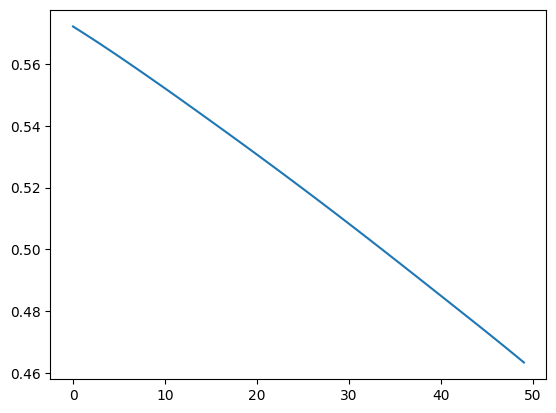

In [18]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
print(loss_history[-1])